In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [137]:
imdb = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\sentiment labelled sentences\\imdb_labelled.csv', delimiter = '\t', header = None)

imdb.columns = ['review', 'positive']

keywords = ['terrible', 'awful', 'worst', 'bad', 'stupid', 'poor', 'worse', 'attempt', 'crap', 'fail', 'annoying', 'cheap',
           'painful', 'avoid', 'slow', 'pretentious', 'problem', 'embarrassing', 'bored', 'horrible', 'lousy', 'unfortunate', 
           'boring', 'sucks', 'sucked', 'waste', 'unbear', ' mess ', 'wasting', 'mediocre', 'sloppy',
           'disappoint', 'garbage', 'whine', 'whiny', 'plot', 'hate ', 'hated', 'negative', 'nobody', 'flaw',
           'script', 'insult', 'do not', 'torture', ' lack', 'lame', 'ridiculous', 'not', 'unbelievable', 'skip', 'shame', 
           'not even', 'miss', 'excellent', 'amazing', 'love', 'incredible', 'fantastic', 'terrific', 'best', 'great', 'fun',
           'beautiful', 'well done', 'enjoy', 'perfect', 'smart', 'highly', 'impress', 'well']

#removed the required space before/after the keyword to improve model accuracy (many sentences in IMDB dataset began with
#these words, so no space in front)
for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(str(key), case = False)

#longer reviews tend to be bad, but there are not that many in the first place, doesnt seem to help model
#imdb['length'] = imdb.review.apply(lambda x: len(x))
#imdb['long'] = imdb['length'].apply(lambda x: 1 if x > 200 else 0)
imdb.head()

,review,positive,terrible,awful,worst,bad,stupid,poor,worse,attempt,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


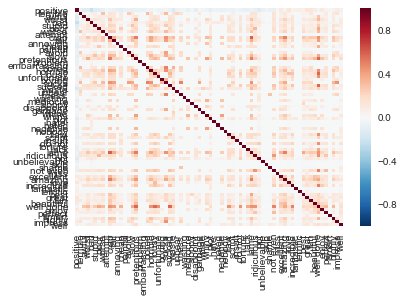

In [138]:
imdb['positive'] = (imdb['positive'] == 1)
sns.heatmap(imdb.corr())

#some pretty strong corr btw intense/amazing,  best/amazing, lovely/amazing...remove? not independent. test w/ and w/o

In [139]:
data = imdb[keywords]
target = imdb['positive']

In [140]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

pred = bnb.predict(data)

print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))

Out of 748 predictions, 150 were misclassified


In [72]:
#Accuracy up to 80% on IMDB set

#Now test on other two sets

In [141]:
yelp = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\sentiment labelled sentences\\yelp_labelled.csv', delimiter = '\t', header = None)

yelp.columns = ['review', 'positive']


for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(str(key), case = False)
    
#yelp.head()

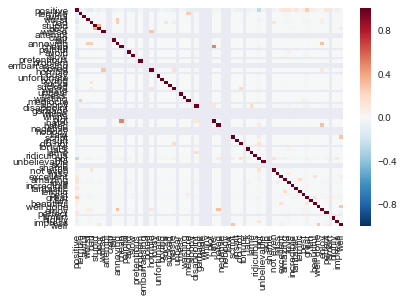

In [142]:
yelp['positive'] = (yelp['positive'] == 1)
sns.heatmap(yelp.corr())

In [143]:
data = yelp[keywords]
target = yelp['positive']

In [144]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

pred = bnb.predict(data)

print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))

Out of 1000 predictions, 288 were misclassified


In [145]:
#Accuracy on Yelp reviews was 71.2%, not bad! Or is it...what was the success rate by just predicting all positive or all neg?
#What was distribution before? 50/50, so our model seems to be pretty good!
yelp.groupby('positive').count()

#Now try Amazon

,review,terrible,awful,worst,bad,stupid,poor,worse,attempt,crap,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
positive,,,,,,,,,,,,,,,,,,,,,
False,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
True,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500


In [146]:
amzn = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\sentiment labelled sentences\\amazon_cells_labelled.csv', delimiter = '\t', header = None)

amzn.columns = ['review', 'positive']


for key in keywords:
    amzn[str(key)] = amzn.review.str.contains(str(key), case = False)
    
#amzn.head()

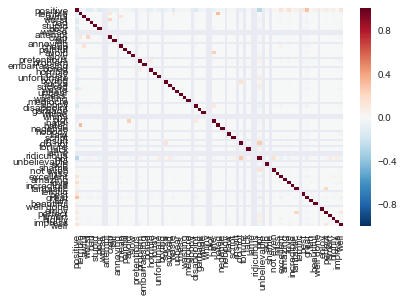

In [147]:
amzn['positive'] = (amzn['positive'] == 1)
sns.heatmap(amzn.corr())

In [148]:
data = amzn[keywords]
target = amzn['positive']

In [149]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

pred = bnb.predict(data)

print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))

Out of 1000 predictions, 272 were misclassified


In [694]:
#Even better...accuracy is up to 72.8%

#What was distribution before? 50/50, so our model seems to be pretty good!
amzn.groupby('positive').count()

,review,terrible,awful,worst,bad,stupid,poor,worse,attempt,crap,...,torture,lack,lame,ridiculous,not,unbelievable,skip,shame,not even,miss
positive,,,,,,,,,,,,,,,,,,,,,
False,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
True,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500


In [ ]:
#Interestingly, the model seems to have performed fairly well on all 3 datasets, with accuracies >= 70% on all 3. The feature set
#took a while to develop, and was based mainly on my findings after looking through many IMDB reviews and including
#many of the key 'negative' words that I saw in those reviews. I also was able to improve the model accuracy quite a bit by 
#removing the required spaces before and after words - I found that many of the reviews actually began with one of my negative
#keywords, so the model was not detecting them before (there would be no space before it)

#In general though, I would not expect this feature engineering process to translate well across industries. I suppose it works
#for reviews because people tend to use the same set of positive/negative words if they are trying to convey positive/negative experiences.